In [1]:
import random
import pandas as pd
from scipy.stats import bernoulli

# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
#sns.set(color_codes=True)

sns.set_palette("husl")

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(10,5)})

#### Criação da distribuição de clientes por sexo {0=masculino, 1=feminino}

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gender Distribution')]

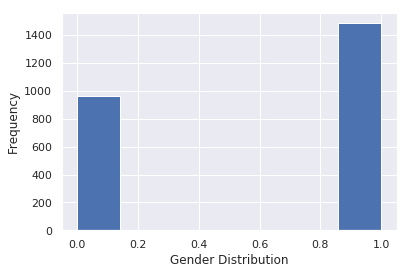

In [2]:
data_gender = bernoulli.rvs(size=2450,p=0.6)

ax= sns.distplot(data_gender,
                 kde=False,
                 hist_kws={"linewidth": 1,'alpha':1})

ax.set(xlabel='Gender Distribution', ylabel='Frequency')

In [3]:
k30 = int(2450 * 0.05)
k2030 = int(2450 * 0.10)
k1020 = int(2450 * 0.20)
k50010 = int(2450 * 0.65)

print(k30+k2030+k1020+k50010+1)

2450


In [4]:
def generate_random_values(n,lb,ub,decimal):
    return  [round(random.uniform(lb, ub),decimal) for i in range(n)]

In [5]:
churn_prob = generate_random_values(2450,0.87,0.99,2)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Churn Probability')]

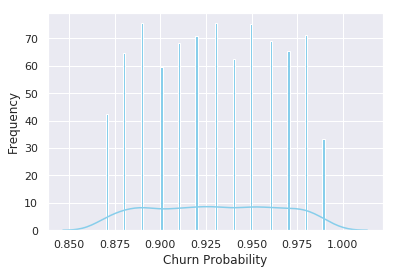

In [6]:
ax = sns.distplot(churn_prob,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Churn Probability', ylabel='Frequency')

In [7]:
idade = generate_random_values(2450,55,75,0)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Valores')]

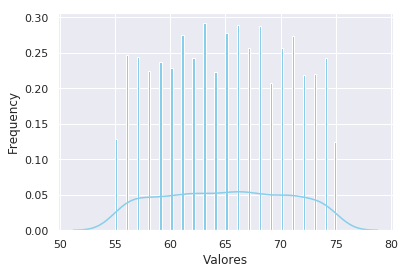

In [8]:
ax = sns.distplot(idade,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Valores', ylabel='Frequency')

In [9]:
n30 = generate_random_values(k30,30000,70000,2)
n2030 = generate_random_values(k2030,20000,30000,2)
n1020 = generate_random_values(k1020,10000,20000,2)
n50010 = generate_random_values(k50010+1,500,10000,2)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Valores')]

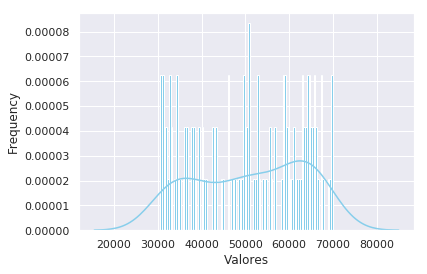

In [10]:
ax = sns.distplot(n30,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Valores', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Valores')]

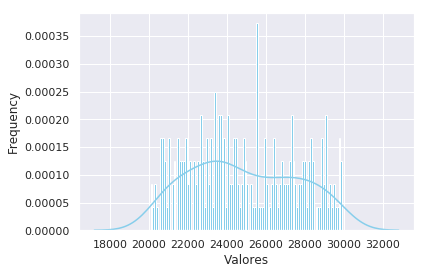

In [11]:
ax = sns.distplot(n2030,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Valores', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Valores')]

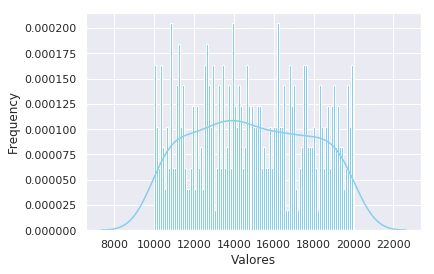

In [12]:
ax = sns.distplot(n1020,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Valores', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Valores')]

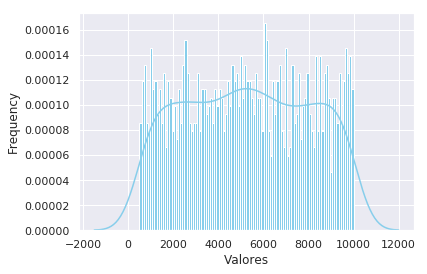

In [13]:
ax = sns.distplot(n50010,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Valores', ylabel='Frequency')

In [14]:
values = n30 + n2030 +n1020  +n50010

In [15]:
random.shuffle(values)
random.shuffle(data_gender)

In [16]:
def get_rate(value):
    if value >=30000:
        return 1.5
    elif value >=20000 and value <30000:
        return 1.6
    elif value >= 10000 and value <20000:
        return 1.65
    else:
        return 1.7
    
    
def get_installments(age):
    if age >=73:
        return 36
    elif age >=67 and age <73:
        return 48
    elif age >= 55 and age <67:
        return 72

In [17]:
clients = dict()
df = pd.DataFrame()
for clientvalue,clientgender,clientage,clientchurnprob in zip(*[values,data_gender,idade,churn_prob]):
    clients['value']=clientvalue
    clients['gender']= clientgender
    clients['rate'] = get_rate(clientvalue)
    clients['age'] = clientage
    clients['churn_prob'] = clientchurnprob
    clients['installments'] = get_installments(clientage)
    df = df.append(clients,ignore_index=True) 

In [18]:
df.head()

,age,churn_prob,gender,installments,rate,value
0,61.0,0.99,1.0,72.0,1.6,27385.38
1,75.0,0.91,1.0,36.0,1.7,6438.02
2,63.0,0.91,0.0,72.0,1.5,36513.42
3,59.0,0.96,0.0,72.0,1.6,29091.45
4,57.0,0.92,1.0,72.0,1.5,52720.62


In [19]:
df['client_id'] = df.index

In [20]:
df[['gender','rate']].groupby('gender').count()

,rate
gender,
0.0,965
1.0,1485


In [21]:
df.to_csv("clients.csv",index=False)